In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

train = pd.read_csv("train_multi.csv")
#test = pd.read_csv("test_new.csv")
#idcol = test['id']
#train.shape

In [3]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_y = train[label_cols]

In [4]:
nrow_train = train.shape[0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [5]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#x = list(df)

In [6]:
corpus_text = []
for i in range(len(train['comment_text'])):
    c = train['comment_text'][i]
    c= c.lower()
    c = c.split()
   # ps = PorterStemmer()
    c = [stemmer.stem(word) for word in c]
    c = ' '.join(c)
    corpus_text.append(c)

x = corpus_text
#stemmer.stem(x)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

#vect = TfidfVectorizer(max_features=50000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
wordvect = TfidfVectorizer( lowercase=True, analyzer='word',stop_words= 'english', token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b',
                       max_features=10000, min_df=2 ,ngram_range=(1,2),dtype=np.float32)

#charvect = TfidfVectorizer( lowercase=True, analyzer='char', max_features=30000,ngram_range=(1,5),token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b')

In [8]:
wordfeatures = wordvect.fit(x)
#charfeatures = charvect.fit(x)

In [9]:
train_word_features = wordvect.transform(train['comment_text'])
#test_word_features = wordvect.transform(test['comment_text'])

#turain_char_features = charvect.transform(train['comment_text'])
#test_char_features = charvect.transform(test['comment_text'])

In [10]:
train =  train_word_features
#test = test_word_features

In [11]:
train_y['toxic'].shape

(159571,)

In [28]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


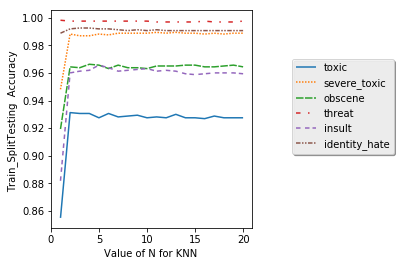

In [16]:
from collections import OrderedDict
from sklearn import metrics
#pred = np.zeros((test.shape[0], len(label_cols)))
#cv_score =[]
linestyles = OrderedDict(
    [(0,               (0, ())),
     (1,      (0, (1, 1))),
     (2,      (0, (5, 1))),
     (3,          (0, (3, 5, 1, 5))),
     (4,  (0, (3, 3, 3, 2))),
     (5, (0, (3, 1, 1, 1, 1, 1)))])
fig = plt.figure()
ax = plt.subplot(111)
for i,col in enumerate(label_cols):
    scores=[]
    n_range=range(1,21)
    for n in n_range:
        temp_scores=[]
        for r in range(1,11):
            x_train,x_test,y_train,y_test=train_test_split(train,train_y[col],test_size=0.001,random_state=r)
            model = KNeighborsClassifier(n_neighbors=n)
            #print('Building {} model for column:{''}'.format(i,col)) 
            model.fit(x_train,y_train)
            KNN_pred=model.predict(x_test)
            temp_scores.append(metrics.accuracy_score(y_test,KNN_pred))
            #print("Accuracy on training set: {:.3f}".format(  metrics.accuracy_score(y_test,KNN_pred)  ))
        scores.append(sum(temp_scores)/10.0)
    ax.plot(n_range,scores,linestyle=linestyles[i],label=col)
plt.xlabel('Value of N for KNN ')
plt.ylabel('Train_SplitTesting  Accuracy ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
   

In [19]:
from sklearn.linear_model import LogisticRegression

Building 0 model for column:toxic
Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


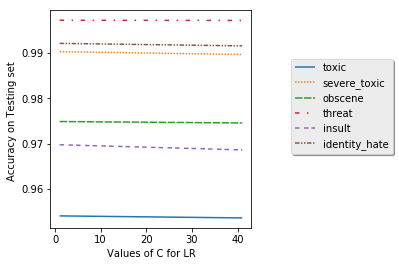

In [20]:
#pred = np.zeros((test.shape[0], len(label_cols)))

fig = plt.figure()
ax = plt.subplot(111)
for i,col in enumerate(label_cols):
    print('Building {} model for column:{''}'.format(i,col)) 
    scores =[]
    c_range=(1,41)
    for c in c_range:
        temp_scores=[]
        r_range=range(1,11)
        for r in r_range:
            x_train,x_test,y_train,y_test=train_test_split(train,train_y[col],test_size=0.20,random_state=r)
            model = LogisticRegression(C=c,random_state = 3)
            model.fit(x_train,y_train)
            temp_scores.append(model.score(x_test, y_test))
        scores.append(sum(temp_scores)/10.0)

    ax.plot(c_range,scores,linestyle=linestyles[i],label=col)
plt.xlabel('Values of C for LR')
plt.ylabel('Accuracy on Testing set ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
        

In [17]:
from sklearn import metrics

In [11]:
## Naive bayes and decision tree classifiers

In [15]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


LR: 0.992091 (0.000704)
NB: 0.991183 (0.000610)


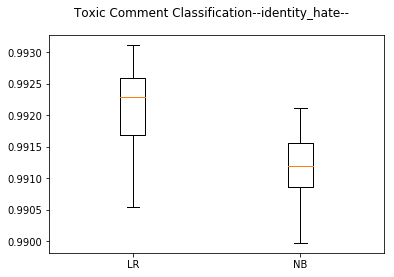

In [26]:

# load dataset
X = train

Y = train_y['identity_hate']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', MultinomialNB()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Toxic Comment Classification--identity_hate--')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Building 0 model for column:toxic
Building 1 model for column:severe_toxic
Building 2 model for column:obscene
Building 3 model for column:threat
Building 4 model for column:insult
Building 5 model for column:identity_hate


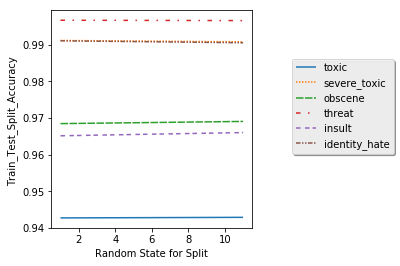

In [39]:
from collections import OrderedDict
from sklearn import metrics
#pred = np.zeros((test.shape[0], len(label_cols)))
#cv_score =[]
linestyles = OrderedDict(
    [(0,               (0, ())),
     (1,      (0, (1, 1))),
     (2,      (0, (5, 1))),
     (3,          (0, (3, 5, 1, 5))),
     (4,  (0, (3, 3, 3, 2))),
     (5, (0, (3, 1, 1, 1, 1, 1)))])
fig = plt.figure()
ax = plt.subplot(111)
for i,col in enumerate(label_cols):
    print('Building {} model for column:{''}'.format(i,col)) 
    scores =[]
    r_range=(1,11)
    for r in r_range:
        x_train,x_test,y_train,y_test=train_test_split(train,train_y[col],test_size=0.20,random_state=r)
        model = MultinomialNB()
        model.fit(x_train,y_train)
        scores.append(model.score(x_test, y_test))
        

    ax.plot(r_range,scores,linestyle=linestyles[i],label=col)
plt.xlabel('Random State for Split')
plt.ylabel('Train_Test_Split_Accuracy ')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
    
        

LR: 0.953933 (0.001464)
NB: 0.944257 (0.001611)
LR: 0.990218 (0.000788)
NB: 0.990581 (0.000698)
LR: 0.975196 (0.000904)
NB: 0.968666 (0.001042)
LR: 0.997117 (0.000546)
NB: 0.996929 (0.000452)
LR: 0.969963 (0.001487)
NB: 0.965445 (0.001605)
LR: 0.992091 (0.000704)
NB: 0.991183 (0.000610)


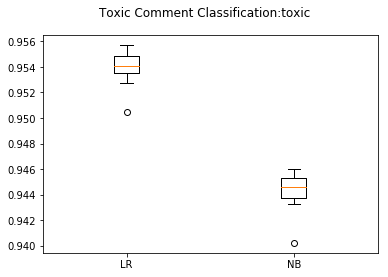

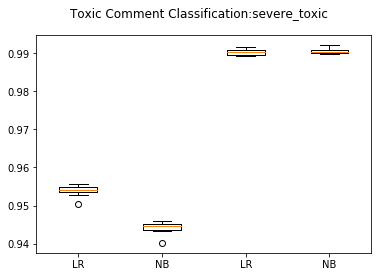

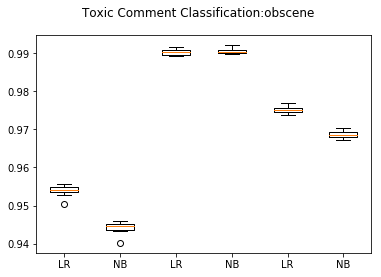

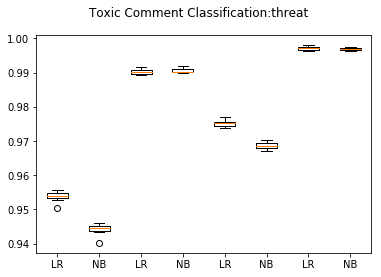

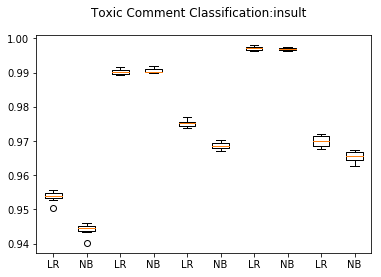

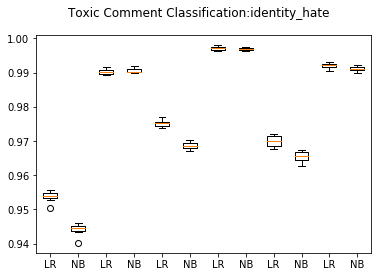

In [40]:

# load dataset
X = train


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', MultinomialNB()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for i,col in enumerate(label_cols):
    Y = train_y[col]
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Toxic Comment Classification:{}'.format(col))
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
plt.show()

CART: 0.937063 (0.001545)
CART: 0.987310 (0.000925)
CART: 0.969318 (0.001227)
CART: 0.996409 (0.000477)
CART: 0.960563 (0.001545)
CART: 0.989729 (0.000594)


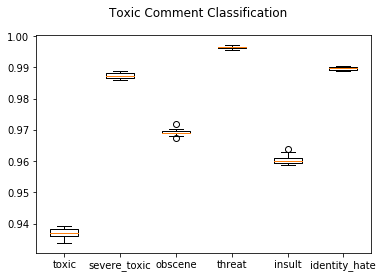

In [45]:

# load dataset
X = train


# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('NB', MultinomialNB()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for i,col in enumerate(label_cols):
    Y = train_y[col]
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Toxic Comment Classification')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(label_cols)
plt.show()